In [2]:
!pip install kaggle

In [39]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [40]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [41]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [42]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [43]:
# importing the dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [44]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1705.jpg', 'with_mask_3039.jpg', 'with_mask_1363.jpg', 'with_mask_461.jpg', 'with_mask_820.jpg']
['with_mask_1186.jpg', 'with_mask_70.jpg', 'with_mask_1238.jpg', 'with_mask_2548.jpg', 'with_mask_2998.jpg']


In [45]:
without_mask_files = os.listdir('/content/data/without_mask')


In [46]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating labels

with mask ---> 1

without mask ---->0

In [47]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3725

In [48]:
labels = with_mask_labels + without_mask_labels

print(len(labels))

7450


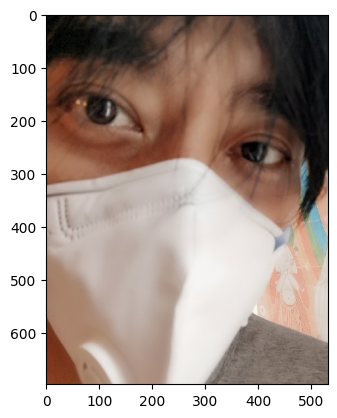

In [49]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_500.jpg')
imgplot = plt.imshow(img)
plt.show()

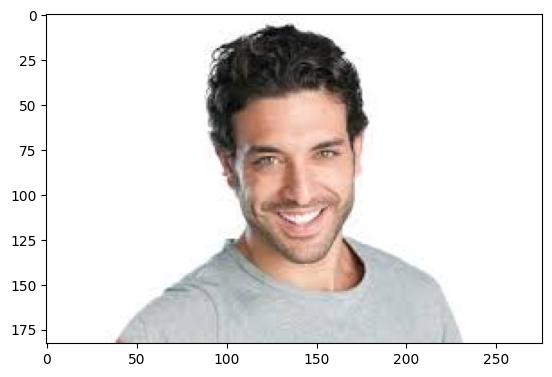

In [50]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1000.jpg')
imgplot = plt.imshow(img)
plt.show()

In [51]:
# image processing


In [52]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [53]:
type(data)
len(data)


7553

array([[[179, 185, 181],
        [188, 193, 189],
        [191, 194, 189],
        ...,
        [249, 247, 236],
        [245, 244, 237],
        [244, 244, 238]],

       [[176, 182, 178],
        [189, 194, 190],
        [197, 200, 195],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[176, 181, 177],
        [195, 200, 196],
        [204, 207, 202],
        ...,
        [208, 204, 206],
        [202, 200, 199],
        [203, 202, 201]],

       ...,

       [[251, 240, 248],
        [253, 241, 244],
        [255, 229, 230],
        ...,
        [222, 220, 222],
        [220, 218, 221],
        [223, 221, 223]],

       [[252, 241, 249],
        [251, 235, 240],
        [253, 228, 230],
        ...,
        [221, 216, 222],
        [221, 215, 222],
        [221, 216, 222]],

       [[254, 242, 250],
        [248, 232, 237],
        [248, 225, 226],
        ...,
        [220, 215, 223],
        [218, 213, 219],
        [218, 213, 219]]], dtype=uint8)
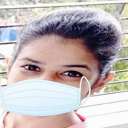

In [54]:
data[0]

In [55]:
type(data[0])

numpy.ndarray

In [56]:
data[0].shape

(128, 128, 3)

In [57]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [58]:
type(X)

numpy.ndarray

In [59]:
type(Y)

numpy.ndarray

In [60]:
print(X.shape)
print(Y.shape)
print(Y)

(7553, 128, 128, 3)
(7450,)
[1 1 1 ... 0 0 0]


In [65]:
num_samples_to_keep = len(Y)  # This will be 7450 in your case

# Trim X to match the length of Y
X_trimmed = X[:num_samples_to_keep]

Train test split

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X_trimmed, Y, test_size=0.2, random_state=2)

In [68]:
print(X_trimmed.shape, X_train.shape, X_test.shape)

(7450, 128, 128, 3) (5960, 128, 128, 3) (1490, 128, 128, 3)


In [69]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[221, 216, 213],
        [221, 216, 213],
        [221, 216, 213],
        ...,
        [213, 208, 202],
        [214, 209, 203],
        [214, 209, 203]],

       [[221, 216, 213],
        [221, 216, 213],
        [221, 216, 213],
        ...,
        [214, 209, 203],
        [214, 209, 203],
        [215, 210, 204]],

       [[221, 216, 213],
        [221, 216, 213],
        [221, 216, 213],
        ...,
        [215, 210, 204],
        [215, 210, 204],
        [216, 211, 205]],

       ...,

       [[223, 218, 212],
        [223, 218, 212],
        [224, 219, 213],
        ...,
        [172, 177, 188],
        [206, 211, 219],
        [220, 221, 224]],

       [[232, 227, 221],
        [228, 223, 218],
        [224, 219, 213],
        ...,
        [ 78,  86, 103],
        [154, 161, 176],
        [202, 205, 213]],

       [[237, 232, 228],
        [233, 228, 224],
        [226, 221, 217],
        ...,
        [ 85,  92, 111],
        [137, 144, 157],
        [192, 194, 202]]], dtype=uint8)
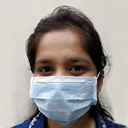

In [70]:
X_train[0]

In [71]:
X_train_scaled[0]

array([[[0.86666667, 0.84705882, 0.83529412],
        [0.86666667, 0.84705882, 0.83529412],
        [0.86666667, 0.84705882, 0.83529412],
        ...,
        [0.83529412, 0.81568627, 0.79215686],
        [0.83921569, 0.81960784, 0.79607843],
        [0.83921569, 0.81960784, 0.79607843]],

       [[0.86666667, 0.84705882, 0.83529412],
        [0.86666667, 0.84705882, 0.83529412],
        [0.86666667, 0.84705882, 0.83529412],
        ...,
        [0.83921569, 0.81960784, 0.79607843],
        [0.83921569, 0.81960784, 0.79607843],
        [0.84313725, 0.82352941, 0.8       ]],

       [[0.86666667, 0.84705882, 0.83529412],
        [0.86666667, 0.84705882, 0.83529412],
        [0.86666667, 0.84705882, 0.83529412],
        ...,
        [0.84313725, 0.82352941, 0.8       ],
        [0.84313725, 0.82352941, 0.8       ],
        [0.84705882, 0.82745098, 0.80392157]],

       ...,

       [[0.8745098 , 0.85490196, 0.83137255],
        [0.8745098 , 0.85490196, 0.83137255],
        [0.87843137, 0

Building a convolutional neural networks

In [72]:
import tensorflow as tf
from tensorflow import keras

In [74]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [76]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - acc: 0.6932 - loss: 0.6225 - val_acc: 0.8540 - val_loss: 0.3431
Epoch 2/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.8837 - loss: 0.2956 - val_acc: 0.8826 - val_loss: 0.2734
Epoch 3/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9105 - loss: 0.2249 - val_acc: 0.9111 - val_loss: 0.2346
Epoch 4/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9302 - loss: 0.1758 - val_acc: 0.9077 - val_loss: 0.2652
Epoch 5/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9426 - loss: 0.1452 - val_acc: 0.9195 - val_loss: 0.2332


Model evaluation

In [78]:
loss,accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy : ' ,accuracy)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - acc: 0.9218 - loss: 0.2179
Test Accuracy :  0.926174521446228


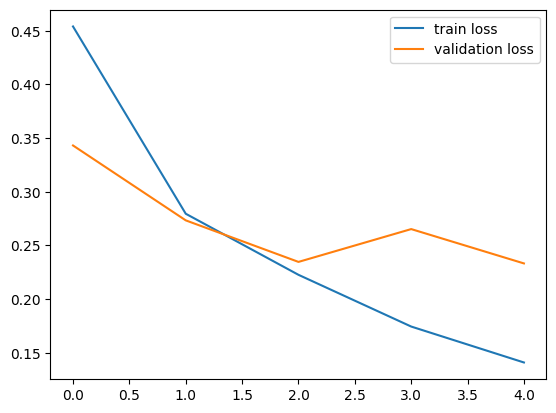

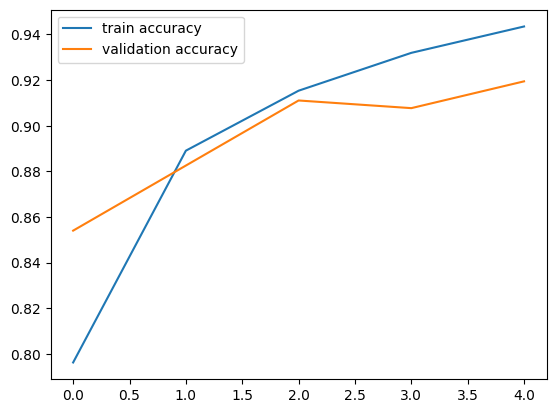

In [79]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/data/with_mask/with_mask_500.jpg


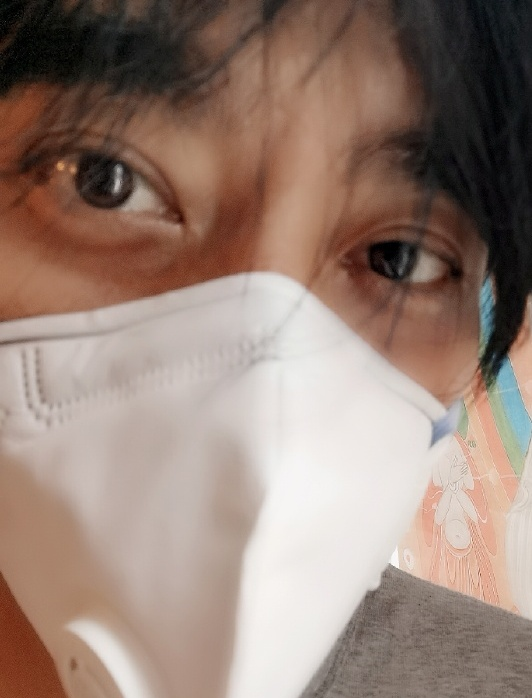

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.52283764 0.6523721 ]]
1
The person in the image is wearing a mask


In [83]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_500.jpg


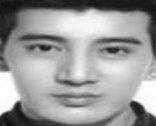

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.56879324 0.30537173]]
0
The person in the image is not wearing a mask


In [88]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')